# Mandatory Assignment 1, Part A

1.   [a](#1a.)
     [b](#1b.)
     [c](#1c.)
     [d](#1d.)
     [e](#1e.)
     [f](#1f.)
     [g](#1g.)
2.   [a](#2a.)
     [b](#2b.)
     [c](#2c.)
     [d](#2d.)
     [e](#2e.)
     [f](#2f.)
     [g](#2g.)  



The NLTK book, chapter 2, has an example in section 2.1, in the paragraph Brown Corpus, where they
compare the frequency of modal verbs across different genres. We will conduct a similar experiment where we are particularly interested in to which degree the different genres use the masculine pronouns (he, him) or the feminine pronouns (she, her).

# 1a.
Conduct a similar experiment as the one mentioned above with the genres: news, religion, government, fiction, romance as conditions, and occurrences of the words: he, she, her, him, as events. Make a table of the conditional frequencies and deliver code and table. (Hint: Have you considered case folding?)

In [1]:
from nltk.corpus import brown
pronouns = ['he', 'him', 'she', 'her']

In [2]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
brown_freq = nltk.FreqDist(
    [w for w in brown.words() if
    w in pronouns]
)

brown_freq

FreqDist({'he': 6566, 'her': 2885, 'him': 2576, 'she': 1949})

In [4]:
genres = ['news', 'religion', 'government', 'fiction', 'romance']
genre_words = [(genre, word)
            for genre in genres
            for word in brown.words(categories=genre)]
genre_words[:10]

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of')]

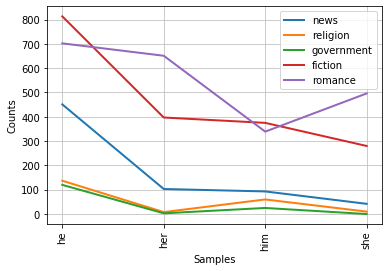

            he her him she 
   fiction 813 397 375 280 
government 120   3  25   0 
      news 451 103  93  42 
  religion 137   8  60  10 
   romance 702 651 339 496 


In [5]:
cfd = nltk.ConditionalFreqDist(
[word for word in genre_words if word[1] in pronouns]
)
cfd.plot()
cfd.tabulate()

In [6]:
grouped_cfd = {}
for g in cfd.keys():
    m = 0
    f = 0
    for p in cfd[g].keys():
        d = {}

        if p in ['he', 'him']:
            m += cfd[g][p]
        else:
            f += cfd[g][p]
    grouped_cfd[g] = {
        'masculine': m,
        'feminine': f
    }

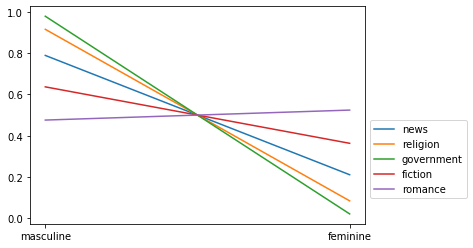

In [7]:
def sort_by_gender(dic):
    g = []
    for item in dic.items():
        g.append(item[0])
        ordered = sorted(([b,a] for a,b in item[1].items()), reverse=True)
        values, keys = zip(*ordered)
        plt.plot(np.array(keys), np.array(values)/sum(np.array(values)))  # divide the values by total number for ratios
    plt.legend(g, loc='best', bbox_to_anchor=(1, .5, 0, 0))

sort_by_gender(grouped_cfd)

# 1b. 
Answer in words what you see. How does gender vary with the genres?


As can been seen in the plot above, I grouped the four pronouns (he, her, him, and she) into their respective groups, `masculine`and `feminine`. I then took the number of occurrences per gender and divided them by the total number of pronouns in that genre. This gave the ratio between masculine and feminine pronouns for each genre, which are represented as the slopes of each line in the plot above. The steeper the line, the greater the relative difference between the number of gender pronouns. 

The only line with a positive slope is the romance genre, meaning this is the only genre with more feminine pronouns than masculine. Ironically, this genre is also the most balanced, since it has the flattest slope. The genre with the greatest relative difference in use of masculine to feminine pronouns was the government genre. As can be read in the table created by `cfd.tabulate()`, only 3 feminine pronouns are used in this genre, compared to a whooping 145 masculine. 

Comparing the ratio of masculine to feminine pronouns across genres is the best metric we have for this exercise, since it disregards the sizes of each genre-pronoun sets, and looks solely at the relationship between the pronouns of each group. 

---



We are now interested in looking at the different forms in which the gender pronouns take on. The initial hypothesis can be formulated:

__Ha__: The relative frequency of the objective form, _her,_  of the feminine personal pronoun (she or her) is higher than the relative frequency of the objective form, _him,_ of the masculine personal pronoun, (he or him).

# 1c. 
__i.__ First, consider the complete Brown corpus. Construct a conditional frequency distribution,
which uses gender as condition, and for each gender counts the occurrences of nominative
forms (he, she) and objective forms (him, her). Report the results in a two by two table. 


In [8]:
nominative = ['he', 'she']
objective  = ['him', 'her']
masculine  = ['he', 'him']
feminine   = ['she', 'her']

forms = []
for word in brown.words():
    if word in pronouns:
        if word in nominative:
            form = 'nominative'
        else:
            form = 'objective'
        if word in masculine:
            gender = 'masculine'
        else:
            gender = 'feminine'
        forms.append((form, gender))


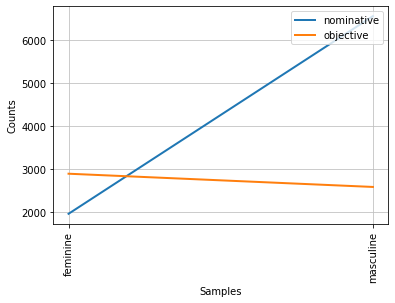

            feminine masculine 
nominative      1949      6566 
 objective      2885      2576 


In [9]:
ncfd = nltk.ConditionalFreqDist(forms)
ncfd.plot()
ncfd.tabulate()

From the plot above, it seems that the initial hypothesis was in fact correct. The feminine objective pronoun _her_ is used more frequently than the nominative _she,_ whereas the opposite can be observed for the masculine objective and nominative pronouns, _him_ and _he_. 

__ii.__ Then calculate the relative frequency of her from she or her, and compare to the relative frequency of him from he or him. Report the numbers. Submit table, numbers and code you used.

In [10]:
import pandas as pd

her = ncfd['objective']['feminine']
him = ncfd['objective']['masculine']
she = ncfd['nominative']['feminine']
he  = ncfd['nominative']['masculine']

pd.DataFrame([[her, him], [her/(her+she), him/(him+he)]], columns=['fem','masc'], index=['occurrences', 'ratio'])

,fem,masc
occurrences,2885.000000,2576.000000
ratio,0.596814,0.281776


Above, we see a comparison of the ratios between the use of the objective pronouns between the two genders. It's apparent that _her_ is used almost twice as often as _him._

This doesn't tell us the whole truth though, since _her_ is the feminine equivalent of _his_ in addition to _him._ To take into account her as a polyseme, we could try finding all occurrences of `'his'+'him'` versus those of `'her'+'hers'`. This way we could count all of the objective forms for both genders, instead of the non-possessive.

# 1d.
Another way of separating the two objective forms is to use a tagged corpus, which separates between the two forms of her, i.e, if the corpus tags her as a personal pronoun differently from her as a possessive pronoun. The tagged Brown corpus with the full tag set does that. Use this to count the occurrences of she, he, her, him as personal pronouns and her, his, hers as possessive pronouns. See NLTK book, Ch. 5, Sec. 2, for the tagged Brown corpus. Report in a two-ways table. 

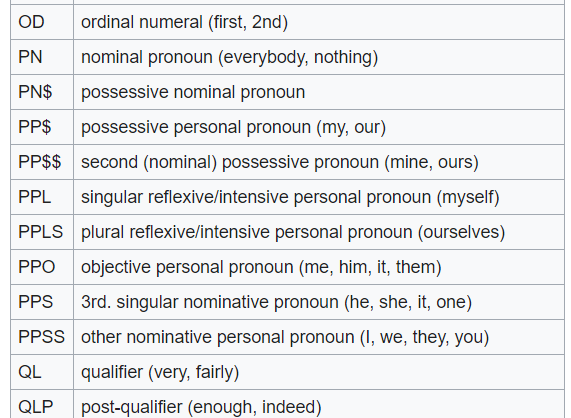

In [11]:
pronouns += ['hers', 'his']
pronouns

['he', 'him', 'she', 'her', 'hers', 'his']

In [12]:
wanted_tags = ['PN$', 'PP$', 'PPO']
tag_words = [x for x in brown.tagged_words() 
             if (x[0] in pronouns 
                 and x[1] in wanted_tags)]

In [13]:
tcfd = nltk.ConditionalFreqDist(tag_words)
tcfd.tabulate()

     PP$  PPO 
her 1775 1106 
him    0 2572 
his 6418    0 


# 1e.
We can now correct the numbers from point [(b)](#1b.) above. How large percentage of the feminine personal pronoun occurs in nominative form and in objective form? What are the comparable percentages for the masculine personal pronoun? 

In [14]:
her_pps = tcfd['her']['PP$']
her_ppo = tcfd['her']['PPO']
his_pps = tcfd['his']['PP$']
him_ppo = tcfd['him']['PPO']

her = her_pps+ her_ppo
him_his = his_pps+him_ppo

pps_ppo = pd.DataFrame([[her_pps/her, her_ppo/her],[his_pps/him_his, him_ppo/him_his]],
            columns=['PP$', 'PPO'],
            index = ['her', 'him'])
pps_ppo

,PP$,PPO
her,0.616106,0.383894
him,0.713904,0.286096


# 1f.
Plot these data in a bar chart.

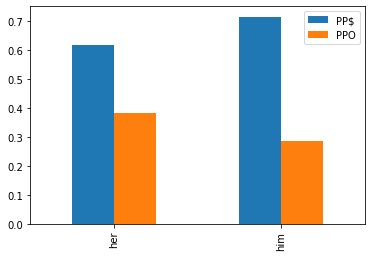

In [15]:
pps_ppo.plot.bar()

# 1g.

Discuss the consequences of these findings. Consider in particular, why do you think the masculine pronoun is more frequent than the feminine pronoun? If you find that the there is a different distribution between nominative and objective forms for the masculine and the feminine pronouns, why do you think that is the case? Do you see any consequences for the development of language technology in general, and for language technology derived from example texts, in particular? Make use of what you know about the Brown corpus.

In the first part of this exercise, we found that masculine pronouns were a lot more common than feminine pronouns, across almost all genres. This reflects women's historical place in society and helps illustrate that language can carry with it the biases of previous generations. 

In reference to the use of nominative pronouns versus objective pronouns across the two genders, it first seemed as though feminine pronouns were more likely to be objective than masculine. However, as was shown through further analysis, this great difference was likely due to the distinction between possessive and objective personal pronouns for the masculine pronouns ‘his’ and ‘him’, whereas feminine pronouns of these two forms were grouped together as ‘her’.

When working with language technologies, these biases must be taken into consideration, so as to not build predictive models where certain groups can be discriminated against. It’s important to note that the Brown Corpus was the first representation of the English language as a whole, per 1961. This was a historically different time than where society is today, especially when taking into consideration the Civil Rights movement of the 60’s and 70’s, as well as antidiscrimination efforts and laws that have grown drastically in popularity within the past few decades. 

Language technologists must make sure to be using as up to date representations of the languages they modeling to both correctly represent the language, and to follow suite with the societal changes inflicted upon the language. 


---

---

# 2a. 
In this exercise, we will consider Zipf’s law. We will use the text Tom Sawyer. First, you need to get hold of the text. 

In [16]:
from urllib import request as r
from nltk import word_tokenize

In [17]:
sawyer_url = 'https://www.gutenberg.org/files/74/74-0.txt'

In [18]:
response = r.urlopen(sawyer_url)
raw = response.read().decode('utf8')

In [19]:
raw[:700]

'\ufeff\r\nThe Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by\r\nMark Twain (Samuel Clemens)\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with almost\r\nno restrictions whatsoever. You may copy it, give it away or re-use\r\nit under the terms of the Project Gutenberg License included with this\r\neBook or online at www.gutenberg.net\r\n\r\nTitle: The Adventures of Tom Sawyer, Complete\r\n\r\nAuthor: Mark Twain (Samuel Clemens)\r\n\r\nRelease Date: August 20, 2006 [EBook #74]\r\nLast Updated: February 23, 2018\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***\r\n\r\nProduced by David Widger\r\n\r\n\r\n\r\n\r\n\r\nTHE ADVENTURES OF TOM '

# 2b.
Now, we need to clean up this raw text by eliminating the headers created by the Gutenberg Project. To start, I'll look at the first couple hundred elements in `raw` and search for the beginning of the book.

In [20]:
raw[:700]

'\ufeff\r\nThe Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by\r\nMark Twain (Samuel Clemens)\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with almost\r\nno restrictions whatsoever. You may copy it, give it away or re-use\r\nit under the terms of the Project Gutenberg License included with this\r\neBook or online at www.gutenberg.net\r\n\r\nTitle: The Adventures of Tom Sawyer, Complete\r\n\r\nAuthor: Mark Twain (Samuel Clemens)\r\n\r\nRelease Date: August 20, 2006 [EBook #74]\r\nLast Updated: February 23, 2018\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***\r\n\r\nProduced by David Widger\r\n\r\n\r\n\r\n\r\n\r\nTHE ADVENTURES OF TOM '

I found that the book starts with the title in all caps. This index can be easily found using Python's built-in `find()`function.

In [21]:
start_index = raw.find('THE ADVENTURES OF TOM SAWYER')
start_index

678

Now I can do the same looking at the end of the text for the footer added by Gutenberg.

In [22]:
raw[-19000:-18000]

'of their lives at present.\r\n\r\nEnd of the Project Gutenberg Ebook of Adventures of Tom Sawyer,\r\nComplete, by Mark Twain (Samuel Clemens)\r\n\r\n*** END OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***\r\n\r\n***** This file should be named 74-0.txt or 74-0.zip ***** This and\r\nall associated files of various formats will be found in:\r\nhttp://www.gutenberg.net/7/74/\r\n\r\nProduced by David Widger. The previous edition was updated by Jose\r\nMenendez.\r\n\r\nUpdated editions will replace the previous one--the old editions will be\r\nrenamed.\r\n\r\nCreating the works from public domain print editions means that no one\r\nowns a United States copyright in these works, so the Foundation (and\r\nyou!) can copy and distribute it in the United States without permission\r\nand without paying copyright royalties. Special rules, set forth in\r\nthe General Terms of Use part of this license, apply to copying and\r\ndistributing Project Gutenberg-tm electronic works to protect the\r\nPROJE

In [23]:
end_index = raw.find('End of the Project Gutenberg')
end_index

402957

Now, let's isolate the text.

In [24]:
sawyer = raw[start_index:end_index]
sawyer[:10], sawyer[-10:]

('THE ADVENT', 'esent.\r\n\r\n')

# 2c.
We are now finished with the clean up and can begin to extract the words.  We are interested in the words used in the book and their distribution. We are  _not interested in punctuation marks._ Consider the following. Should you case fold the text? How do you handle the punctuation marks?

In [25]:
import string 
all_tokens = word_tokenize(sawyer)
tokens = [t.lower() for t in all_tokens if t not in string.punctuation+'--'+'“'+'”']

Here, I removed all the regular punctuation marks, as well as a few I saw in the beginning of `all_tokens`. 

It's also probably a good idea to case-fold here, since we are only interested in the frequency distribution of the words. Case-folding ensures that the words at the beginning of the sentences are grouped together with their respective counterparts in the middle of sentences. This was done by calling the str-function `lower()` when adding `t` to our list of tokens.

We are left with `tokens` which should consist of all the tokens with some letter in them, all of which contain only lowercase letters. 

# 2d.
We can now use the nltk.FreqDist() to count the words. We will report the 20 most frequent words in a table
with their absolute frequencies.


In [26]:
fd = nltk.FreqDist(tokens)

In [27]:
fd_top20 = pd.DataFrame(fd.most_common(20), columns=['word', 'freq'], index=range(1,21))
fd_top20

,word,freq
1,the,3791
2,and,3106
3,a,1862
4,to,1719
5,of,1461
6,it,1268
7,he,1247
8,was,1176
9,that,1009
10,i,1003


# 2e.
Considering now the frequencies of frequencies, let's see: how many words occur n times for n = 1, 2, ..., 10; how many words have between 11 and 50 occurrences; how many have 51-100 occurrences; and how many words have more than 100 occurrences. 

In [28]:
freq_of_freq = nltk.FreqDist([i[1] for i in fd.items()])

In [29]:
# n = 1, ... , 10
freq_top_10 = pd.DataFrame(freq_of_freq.most_common(10), 
                           columns=['freq', '# words with this freq']).sort_values('freq').set_index('freq')

I got lucky here, since the most common frequencies of frequencies wasn't in numerical order, but still had all the top 10 within in the most common 10. 

In [30]:
def from_to(f=0, t=4000, freqdist=freq_of_freq):
    f_to_t = range(f, t+1)
    n_f_to_t = [item for item in freqdist.items() if item[0] in f_to_t]
    return pd.DataFrame(n_f_to_t, columns=['freq', '# words with this freq']).sort_values('freq').set_index('freq')

To make these next few calculations easier, I've created a function that converts the frequencies for a given range to a data-frame. This can later be added to the `freq_top_10`for our final table.

In [31]:
# n \in [11, 50]
freq_11_to_50 = from_to(11, 50)

In [32]:
# n \in [51, 100]
freq_51_to_100 = from_to(51, 100)

In [33]:
# n > 100
freq_greater_100 = from_to(101)  # set to=4000, which is greater than any frequency found in 2d

In [34]:
freq_counts = freq_top_10.append(pd.DataFrame([
    ['11-50', sum(freq_11_to_50['# words with this freq'])],
    ['51-100', sum(freq_51_to_100['# words with this freq'])],
    ['100+', sum(freq_greater_100['# words with this freq'])]
], columns=['freq', '# words with this freq']).set_index('freq'))
freq_counts

,# words with this freq
freq,
1,4104
2,1328
3,630
4,402
5,226
6,162
7,163
8,131
9,77


# 2f.
Let's go back to the first frequency distribution, i.e. the words ordered by their frequencies, with the most frequent word first. Let `r` be the frequency rank for each word and `n` its frequency. Hence, the most frequent word gets rank 1, the
second most frequent word gets rank two, and so on. According to Zipf’s law, `r*n` should be nearly constant. Let's find `r*n` for the 20 most frequent words and report in a table, to see how well this fits Zipf’s law. 

In [35]:
fd_top20.insert(2, 'r*n', fd_top20.index*fd_top20['freq'])

In [36]:
fd_top20

,word,freq,r*n
1,the,3791,3791
2,and,3106,6212
3,a,1862,5586
4,to,1719,6876
5,of,1461,7305
6,it,1268,7608
7,he,1247,8729
8,was,1176,9408
9,that,1009,9081
10,i,1003,10030


For the first 10 most common words, `r*n` slowly but surely increases. For `r>10` it seems as if Zipf's law is more or less correct. 

# 2g.
Let's now plot the rank against frequency for the entire frequency distribution. 

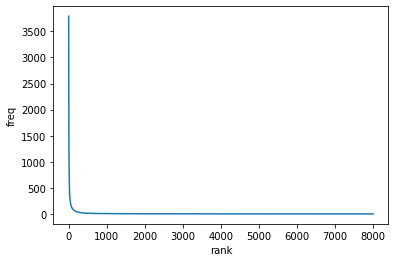

In [37]:
fd_df = pd.DataFrame(fd.items(), columns=['word', 'freq']).sort_values('freq', ascending=False)
fd_df.index = np.arange(1, len(fd_df)+1)


plt.plot(fd_df.index, fd_df.freq)
plt.xlabel('rank')
plt.ylabel('freq')
plt.show()

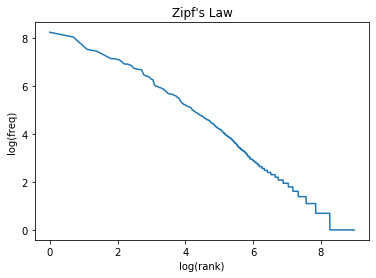

In [38]:
plt.plot(np.log(fd_df.index), np.log(fd_df.freq))
plt.xlabel('log(rank)')
plt.ylabel('log(freq)')
plt.title('Zipf\'s Law')
plt.show()